# Step Two: Factor Screening (Forseeablility Analysis)

The purpose of this part is to rolling over different sectors to obtain the factor return's Spearman ranked ICs (the correlation between factor ranks and the future return). And then, screen the stable and significant factors in different industry sectors. Alphalens here is a fantastic toolkit to visualize the correlations as well as other computations. 

From the heatmap, we can see the historical turnover on such factor returns. **Stability is preferable.** The more stable, the more reliable of this factor.

From the average IC along separate sectors, we can see the significance of the factors along such sector. **Larger absolute value is appreciable.** The greater the absolute number, the more significant of this factor.

The data source is Chinese A market. The factors we tested are:
    
    * 'total_turnover'
    * 'volume'
    * 'market_cap'
    * 'a_share_market_val_2'
    * 'cash_received_from_sales_of_goods'
    * 'pb_ratio'
    * 'net_profit'
    * 'ps_ratio'
    
Time line: 01/01/2012 - 02/29/2016

In [1]:
import statsmodels
#from statsmodels.distributions import genpoisson_p
statsmodels.__version__

'0.9.0'

In [2]:
from rqdata_utils import *
import pandas
import numpy as np
import scipy as sp
import alphalens as al
%matplotlib inline

In [3]:
price_df,instrument_df,equity_df = get_price_instrument_equity("cn_stock_price_2012_2018.csv","cn_instrument_info_2012_2018.csv","cn_equity_daily_2012_2018.csv","sectorCode")

In [4]:
price_df.head()

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,601933.XSHG,601939.XSHG,601958.XSHG,601988.XSHG,601989.XSHG,601991.XSHG,601992.XSHG,601996.XSHG,601998.XSHG,601999.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,4.9886,5.6004,7.91,3.86,2.5072,4.6067,0.7503,4.4196,3.6575,5.3676,...,3.3540,2.9609,10.2997,1.9096,4.8559,4.3081,3.7102,1.9345,2.9971,7.1067
2012-01-05,5.0642,5.5393,7.33,3.86,2.4763,4.3733,0.7197,4.1745,3.6575,4.8362,...,3.3349,3.0136,9.9530,1.9424,4.6544,4.2589,3.5263,1.8143,3.0797,6.9465
2012-01-06,5.0511,5.4705,7.36,3.86,2.4701,4.2467,0.7242,4.4240,3.6575,4.9513,...,3.2991,3.0596,10.0655,1.9424,4.5680,4.3327,3.6551,1.8536,3.1173,7.0502
2012-01-09,5.1926,5.6615,7.70,3.86,2.5380,4.4133,0.7605,4.8659,3.6575,5.1727,...,3.3607,3.1188,10.6090,1.9555,4.7408,4.3655,3.8574,1.9484,3.1624,7.3518
2012-01-10,5.1926,5.7532,8.16,3.86,2.6307,4.5200,0.7990,5.0716,3.6575,5.4030,...,3.5477,3.1452,11.6681,1.9621,4.9903,4.3245,4.1056,2.1425,3.2074,7.6345


In [5]:
instrument_df.head()

,exchange,abbrevSymbol,shenwanIndustryCode,shenwanIndustryName,industryCode,industryName,sectorCode,sectorName
bookId,,,,,,,,
000001.XSHE,XSHE,PAYH,801780.INDX,银行,J66,货币金融服务,Financials,金融
000002.XSHE,XSHE,WKA,801180.INDX,房地产,K70,房地产业,RealEstate,房地产
000004.XSHE,XSHE,GNKJ,801150.INDX,医药生物,C27,医药制造业,HealthCare,医疗保健
000005.XSHE,XSHE,SJXY,801160.INDX,公用事业,N77,生态保护和环境治理业,Industrials,工业
000006.XSHE,XSHE,SZYA,801180.INDX,房地产,K70,房地产业,RealEstate,房地产


In [6]:
equity_df.head()

return   close  total_turnover      volume  \
date       order_book_id                                                 
2012-01-04 000001.XSHE   -0.027582  4.9886    2.275637e+08  40894428.0   
           000002.XSHE   -0.018742  5.6004    3.559891e+08  47432958.0   
           000004.XSHE   -0.022250  7.9100    3.763833e+06    465469.0   
           000005.XSHE    0.000000  3.8600    0.000000e+00         0.0   
           000006.XSHE   -0.009756  2.5072    7.619286e+06   2513811.0   

                            week   month report_quarter  pb_ratio  \
date       order_book_id                                            
2012-01-04 000001.XSHE    0.5242  0.4331            NaN       NaN   
           000002.XSHE    0.3887  0.4030         2011q3    1.5216   
           000004.XSHE    0.5797  0.7506         2011q3    8.8175   
           000005.XSHE       NaN     NaN         2011q3    5.3480   
           000006.XSHE    0.1601  0.1667         2011q3    1.4348   

                            net_profit  a_share_market_val_2  ps_ratio  \
date       order_book_id                                                 
2012-01-04 000001.XSHE             NaN                   NaN       NaN   
           000002.XSHE    4.106349e+09          7.082120e+10    1.1227   
           000004.XSHE    4.500363e+06          6.634549e+08    8.9157   
           000005.XSHE    1.365665e+07          3.527048e+09   55.5494   
           000006.XSHE    2.763917e+08          3.929464e+09    1.5507   

                          cash_received_from_sales_of_goods    market_cap  \
date       order_book_id                                                    
2012-01-04 000001.XSHE                                  NaN           NaN   
           000002.XSHE                         7.516785e+10  8.059489e+10   
           000004.XSHE                         5.949968e+07  6.642556e+08   
           000005.XSHE                         2.565851e+07  3.529328e+09   
           000006.XSHE                         2.531436e+09  4.015370e+09   

                           sectorCode  
date       order_book_id               
2012-01-04 000001.XSHE     Financials  
           000002.XSHE     RealEstate  
           000004.XSHE     HealthCare  
           000005.XSHE    Industrials  
           000006.XSHE     RealEstate

In [7]:
factor_columns = [equity_df.columns[i] for i in (2,3,7,8,9,10,11,12)]
factor_columns

['total_turnover',
 'volume',
 'pb_ratio',
 'net_profit',
 'a_share_market_val_2',
 'ps_ratio',
 'cash_received_from_sales_of_goods',
 'market_cap']

In [8]:
factor_list = []
for col in factor_columns:
#     print("factor: {}".format(col))
    factor_list.append(equity_df[col])
sectors = equity_df['sectorCode']

In [9]:
# ic_list = []
# for my_factor in factor_list:
#     factor_data = al.utils.get_clean_factor_and_forward_returns(factor=my_factor,
#                                                             prices=price_df,
#                                                             groupby=sectors,
#                                                             periods=(1,21,63),
#                                                             max_loss=1)
#     ic = al.performance.mean_information_coefficient(factor_data,group_adjust=False,by_group=True,by_time=None)
#     print("#######################################################")
#     print("factor: {}".format(my_factor.name))
#     print(ic)
#     ic_list.append(al.performance.mean_information_coefficient(factor_data,group_adjust=False,by_group=True,by_time=None))

In [10]:
# ic_list[0]

In [11]:
# result = pd.concat(ic_list, keys=factor_columns)

In [12]:
# result.index = result.index.set_names(['factor','group'])
# result

In [13]:
# result.to_csv("factor_ic_analysis.csv")
# result2 = result.copy()

Dropped 4.4% entries from factor data: 3.7% in forward returns computation and 0.7% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: total_turnover
                                 1D       21D       63D
group                                                  
ConsumerDiscretionary     -0.054916 -0.104514 -0.135491
ConsumerStaples           -0.056721 -0.090320 -0.121120
Energy                    -0.054456 -0.122589 -0.160832
Financials                -0.016748 -0.012698 -0.027945
HealthCare                -0.033571 -0.047261 -0.067568
Industrials               -0.057764 -0.113454 -0.143322
InformationTechnology     -0.039089 -0.086279 -0.119018
Materials                 -0.054032 -0.111765 -0.147597
RealEstate                -0.057695 -0.120625 -0.151943
TelecommunicationServices -0.053423 -0.062116 -0.054736
Utilities                 -0.066819 -0.109022 -0.13

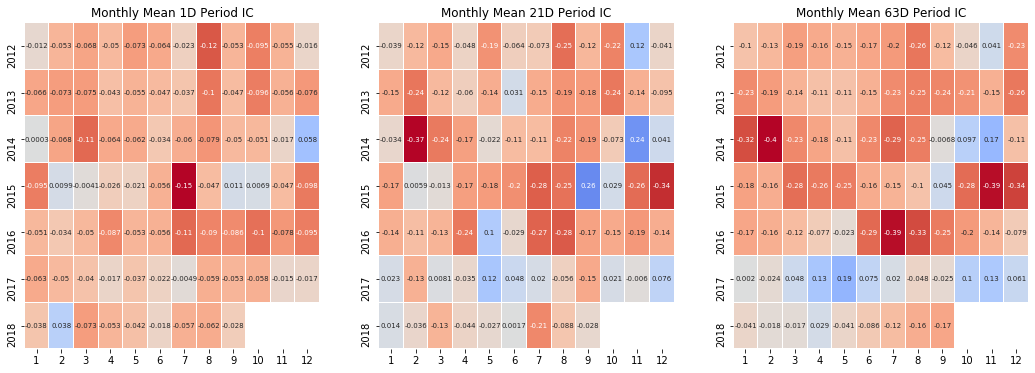

Dropped 4.4% entries from factor data: 3.7% in forward returns computation and 0.7% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: volume
                                 1D       21D       63D
group                                                  
ConsumerDiscretionary     -0.040942 -0.068150 -0.080717
ConsumerStaples           -0.044733 -0.058934 -0.072067
Energy                    -0.048438 -0.080163 -0.084074
Financials                -0.011062  0.010663  0.009293
HealthCare                -0.022328 -0.021306 -0.028192
Industrials               -0.046613 -0.076292 -0.085235
InformationTechnology     -0.027361 -0.050840 -0.065803
Materials                 -0.041398 -0.071299 -0.082954
RealEstate                -0.045849 -0.087237 -0.105108
TelecommunicationServices -0.053791 -0.026445  0.008610
Utilities                 -0.053634 -0.072920 -0.074108


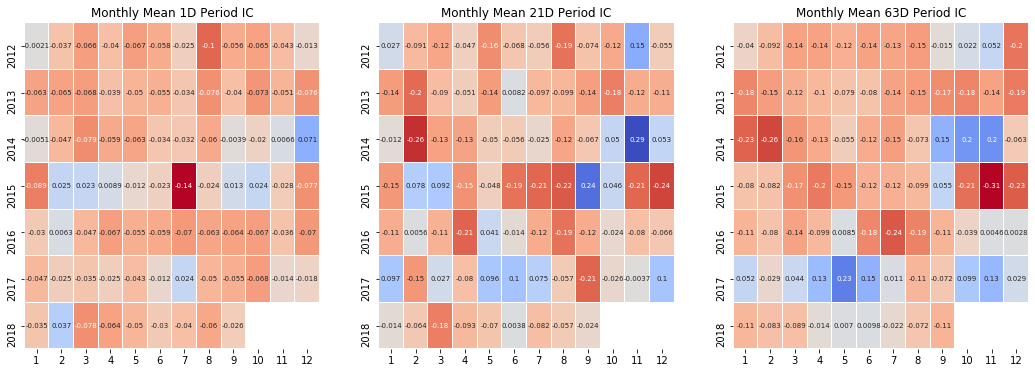

Dropped 5.5% entries from factor data: 5.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: pb_ratio
                                 1D       21D       63D
group                                                  
ConsumerDiscretionary     -0.030143 -0.058735 -0.087347
ConsumerStaples           -0.028659 -0.058594 -0.086713
Energy                    -0.020422 -0.047591 -0.067875
Financials                -0.027457 -0.079249 -0.107762
HealthCare                -0.020067 -0.015659 -0.023434
Industrials               -0.027458 -0.068824 -0.099201
InformationTechnology     -0.025103 -0.059126 -0.086438
Materials                 -0.025869 -0.059949 -0.093771
RealEstate                -0.031904 -0.073674 -0.104591
TelecommunicationServices  0.008465 -0.014042 -0.026862
Utilities                 -0.027127 -0.063744 -0.096308


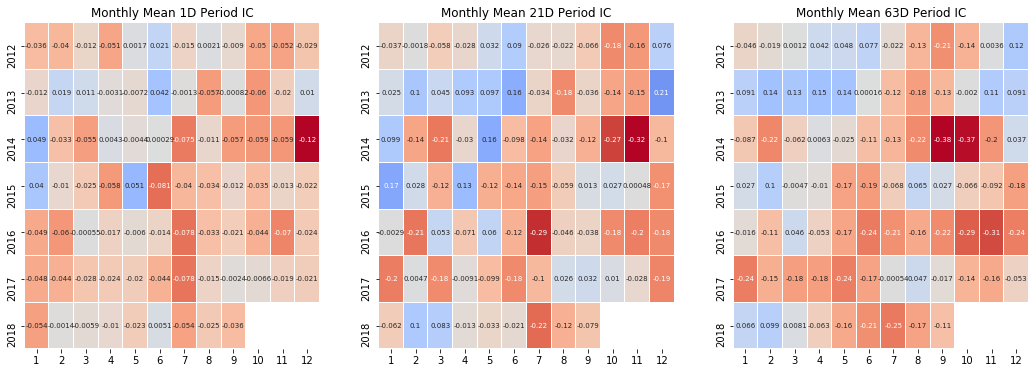

Dropped 5.5% entries from factor data: 5.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: net_profit
                                 1D       21D       63D
group                                                  
ConsumerDiscretionary      0.005852  0.001853 -0.008688
ConsumerStaples            0.007136  0.010319  0.010529
Energy                     0.006268 -0.003555 -0.030678
Financials                 0.007549  0.023031  0.018582
HealthCare                 0.007622  0.023570  0.031362
Industrials                0.007233  0.015945  0.019888
InformationTechnology      0.007420  0.011789  0.007631
Materials                  0.010883  0.018741  0.014236
RealEstate                 0.004761 -0.002616 -0.013022
TelecommunicationServices -0.024338  0.001526 -0.004884
Utilities                  0.005925  0.013976  0.008973

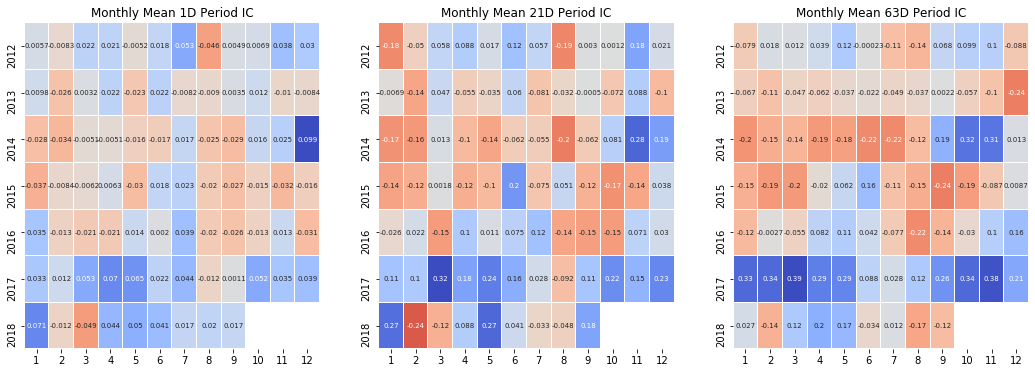

Dropped 5.5% entries from factor data: 5.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: a_share_market_val_2
                                 1D       21D       63D
group                                                  
ConsumerDiscretionary     -0.018109 -0.059748 -0.098447
ConsumerStaples           -0.015005 -0.039955 -0.059655
Energy                    -0.015212 -0.061915 -0.099764
Financials                -0.014462 -0.042846 -0.085132
HealthCare                -0.008244 -0.013767 -0.024346
Industrials               -0.018162 -0.054142 -0.080366
InformationTechnology     -0.013307 -0.048438 -0.086744
Materials                 -0.022174 -0.073259 -0.113994
RealEstate                -0.015063 -0.050184 -0.080073
TelecommunicationServices -0.032275 -0.044261 -0.032967
Utilities                 -0.016145 -0.042601

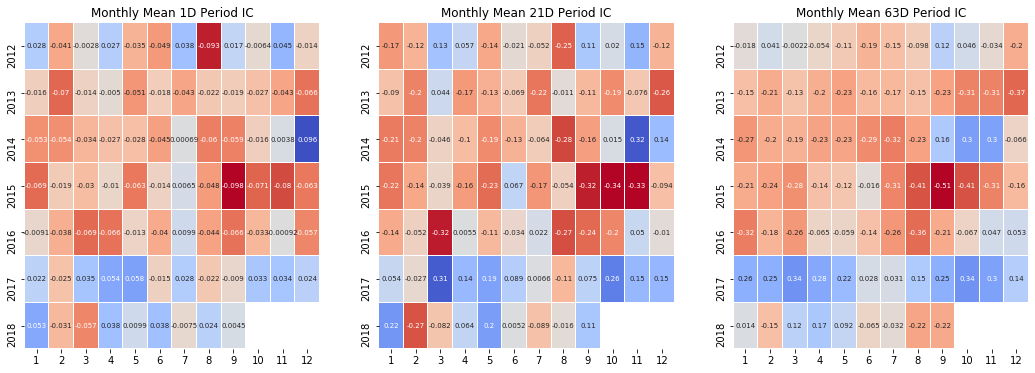

Dropped 5.5% entries from factor data: 5.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: ps_ratio
                                 1D       21D       63D
group                                                  
ConsumerDiscretionary     -0.018034 -0.039945 -0.059755
ConsumerStaples           -0.017272 -0.036586 -0.065946
Energy                    -0.010553 -0.021289 -0.025004
Financials                -0.005902 -0.006599 -0.017721
HealthCare                -0.012166 -0.019445 -0.032195
Industrials               -0.013498 -0.036857 -0.048130
InformationTechnology     -0.015708 -0.046909 -0.070218
Materials                 -0.012935 -0.034600 -0.054728
RealEstate                -0.019667 -0.052470 -0.066584
TelecommunicationServices  0.019454  0.012515 -0.021062
Utilities                 -0.012235 -0.032850 -0.047009


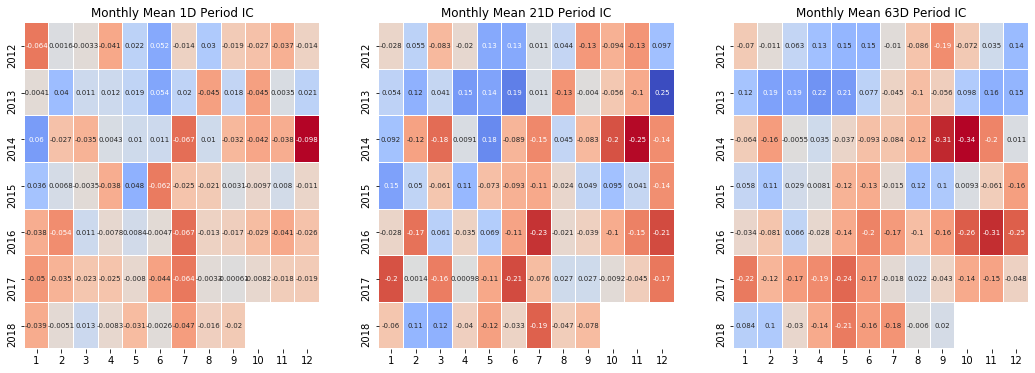

Dropped 5.5% entries from factor data: 5.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: cash_received_from_sales_of_goods
                                 1D       21D       63D
group                                                  
ConsumerDiscretionary      0.002867 -0.004621 -0.012591
ConsumerStaples            0.005368  0.008680  0.017905
Energy                    -0.001857 -0.023409 -0.042713
Financials                 0.001740 -0.002666 -0.005989
HealthCare                 0.002357  0.003037  0.002756
Industrials                0.000321 -0.000493 -0.003909
InformationTechnology      0.001510  0.001333 -0.005474
Materials                 -0.002690 -0.015009 -0.024296
RealEstate                 0.004703  0.011183  0.009069
TelecommunicationServices -0.025864 -0.014042  0.012515
Utilities                 -0.002

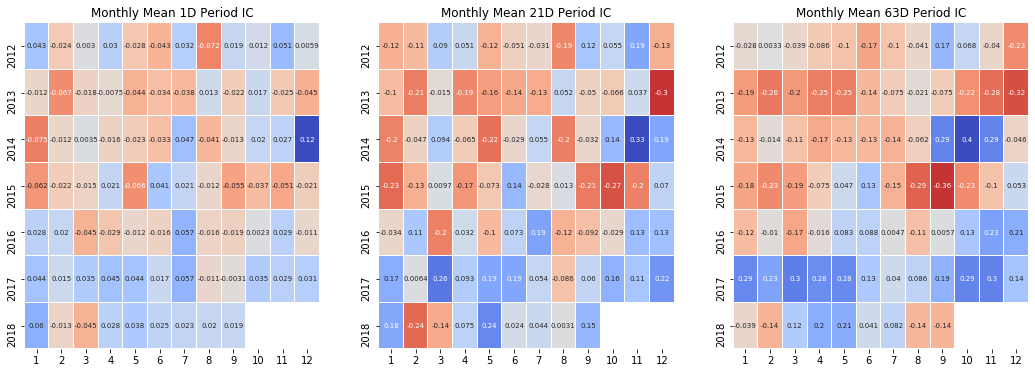

Dropped 5.5% entries from factor data: 5.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: market_cap
                                 1D       21D       63D
group                                                  
ConsumerDiscretionary     -0.021577 -0.065981 -0.105951
ConsumerStaples           -0.018188 -0.047240 -0.071056
Energy                    -0.018739 -0.067479 -0.106802
Financials                -0.014921 -0.038397 -0.094034
HealthCare                -0.009937 -0.018340 -0.032223
Industrials               -0.021537 -0.061310 -0.092063
InformationTechnology     -0.016881 -0.053364 -0.094277
Materials                 -0.024820 -0.079358 -0.123149
RealEstate                -0.018958 -0.053861 -0.084868
TelecommunicationServices -0.032885 -0.050672 -0.061661
Utilities                 -0.020162 -0.048849 -0.066680

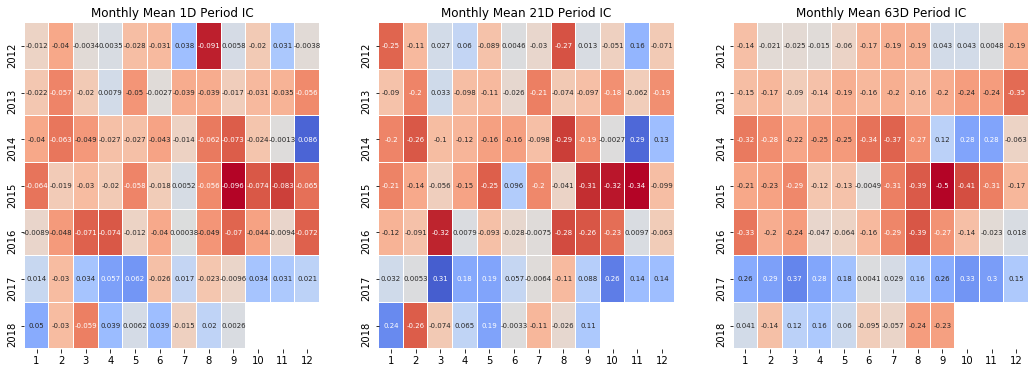

In [14]:
ic_list = []
monthly_ic_list = []
for my_factor in factor_list:
    factor_data = al.utils.get_clean_factor_and_forward_returns(factor=my_factor,
                                                            prices=price_df,
                                                            groupby=sectors,
                                                            periods=(1,21,63),
                                                            max_loss=1)
    mean_ic = al.performance.mean_information_coefficient(factor_data,group_adjust=False,by_group=True,by_time=None)
    mean_monthly_ic = al.performance.mean_information_coefficient(factor_data, by_time='M')
    print("#######################################################")
    print("factor: {}".format(my_factor.name))
    print(mean_ic)
    al.plotting.plot_monthly_ic_heatmap(mean_monthly_ic)
    plt.show()
    ic_list.append(mean_ic)
    monthly_ic_list.append(mean_monthly_ic)


result = pd.concat(ic_list, keys=factor_columns)
result.index = result.index.set_names(['factor','group'])
result.to_csv("factor_ic_analysis.csv")

In [15]:
from rqdata_utils import *
import pandas
import numpy as np
import scipy as sp
import alphalens as al
%matplotlib inline

price_df,instrument_df,equity_df = get_price_instrument_equity("cn_stock_price_2012_2018.csv",
                                                               "cn_instrument_info_2012_2018.csv",
                                                               "cn_equity_daily_2012_2018.csv",
                                                               "sectorCode")

factor_columns = [equity_df.columns[i] for i in (2,3,7,8,9,10,11,12)]
# mean_ic_df, monthly_ic_list = ic_analysis(equity_df, price_df, factor_columns,
#                                           group_column='sectorCode', periods=(1,22,66),
#                                          group_adjust=True)

Dropped 4.6% entries from factor data: 3.9% in forward returns computation and 0.7% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: total_turnover
                                 1D       22D       66D
group                                                  
ConsumerDiscretionary     -0.054975 -0.105144 -0.137131
ConsumerStaples           -0.057205 -0.090473 -0.123064
Energy                    -0.054749 -0.123660 -0.161966
Financials                -0.017338 -0.013050 -0.026926
HealthCare                -0.033962 -0.047430 -0.069084
Industrials               -0.057842 -0.114194 -0.144688
InformationTechnology     -0.039300 -0.087522 -0.120310
Materials                 -0.054267 -0.113481 -0.149289
RealEstate                -0.057508 -0.121008 -0.154120
TelecommunicationServices -0.054754 -0.069707 -0.067468
Utilities                 -0.066683 -0.108930 -0.13

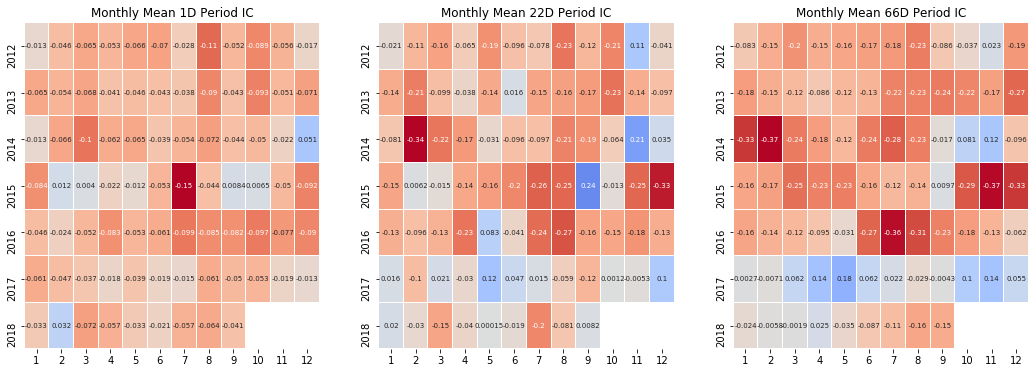

Dropped 4.6% entries from factor data: 3.9% in forward returns computation and 0.7% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: volume
                                 1D       22D       66D
group                                                  
ConsumerDiscretionary     -0.040921 -0.068197 -0.081544
ConsumerStaples           -0.044914 -0.058942 -0.073059
Energy                    -0.048619 -0.080284 -0.083088
Financials                -0.011429  0.010452  0.010312
HealthCare                -0.022465 -0.021007 -0.029294
Industrials               -0.046594 -0.076370 -0.085120
InformationTechnology     -0.027440 -0.051414 -0.066068
Materials                 -0.041513 -0.072075 -0.083237
RealEstate                -0.045609 -0.087117 -0.106724
TelecommunicationServices -0.055123 -0.030807  0.009242
Utilities                 -0.053378 -0.072451 -0.073737


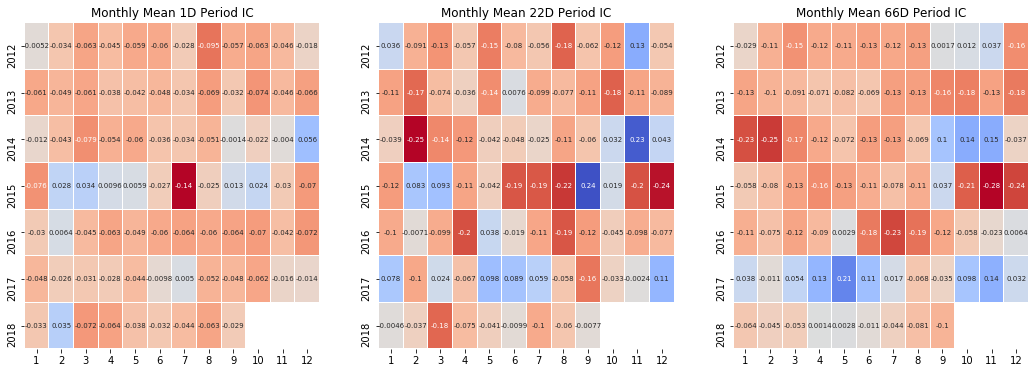

Dropped 5.7% entries from factor data: 5.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: pb_ratio
                                 1D       22D       66D
group                                                  
ConsumerDiscretionary     -0.030140 -0.059848 -0.088536
ConsumerStaples           -0.028941 -0.059319 -0.088262
Energy                    -0.020295 -0.047422 -0.069305
Financials                -0.027234 -0.079821 -0.109543
HealthCare                -0.020383 -0.015936 -0.024137
Industrials               -0.027429 -0.069966 -0.100502
InformationTechnology     -0.025166 -0.060057 -0.088141
Materials                 -0.025919 -0.061308 -0.095364
RealEstate                -0.031805 -0.074772 -0.106835
TelecommunicationServices  0.009704 -0.011621 -0.022936
Utilities                 -0.027136 -0.064500 -0.098258


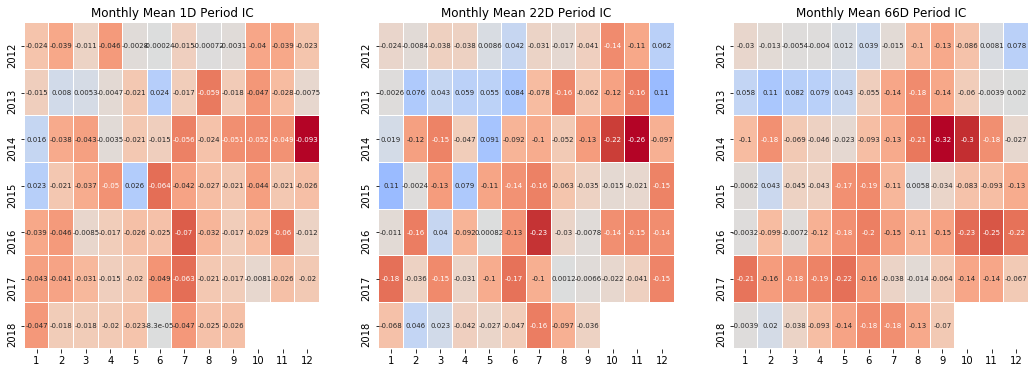

Dropped 5.7% entries from factor data: 5.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: net_profit
                                 1D       22D       66D
group                                                  
ConsumerDiscretionary      0.005544  0.001953 -0.009737
ConsumerStaples            0.006565  0.010802  0.010078
Energy                     0.005824 -0.004786 -0.032697
Financials                 0.007538  0.023447  0.018828
HealthCare                 0.007314  0.024208  0.031515
Industrials                0.006889  0.016331  0.020345
InformationTechnology      0.007218  0.012296  0.007435
Materials                  0.010474  0.018748  0.014029
RealEstate                 0.004654 -0.002849 -0.013063
TelecommunicationServices -0.025606 -0.001529 -0.016820
Utilities                  0.005739  0.014197  0.006705

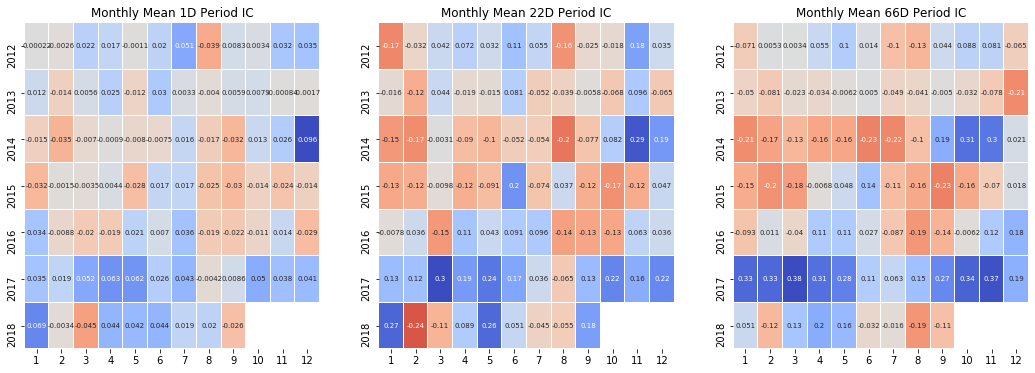

Dropped 5.7% entries from factor data: 5.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!


In [ ]:
mean_ic_df, monthly_ic_list = ic_analysis(equity_df, price_df, factor_columns,group_column='sectorCode', periods=(1,22,66),group_adjust=True)
mean_ic_df.to_csv("factor_ic_analysis.csv")